# Линейная регрессия. Начало.

## План

- Функционалы и метрики
- Линейная регресиия: точное vs приближенное решение
- Интерпретация прогнозов

## Функционалы и метрики

* Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

* Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример:

чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$$

где $$\hat y_{i} = \Sigma_{i=0}^{k}w_{k}x_{ik}$$

А как метрику можем использовать RMSE

$$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения:

*  Чтобы сдать математику, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали математику будет являться оценка, полученная в конце курса.

*  Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [104]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor

from sklearn.datasets import fetch_california_housing

In [105]:
RANDOM_STATE = 42

In [106]:
np.random.seed(42) # фиксировали случайность

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [109]:
X.head() # признаки

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [110]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [112]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [113]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #, random_state=RANDOM_STATE)

In [114]:
sc = StandardScaler() # x -> (x - mean) / std

sc.fit(X_train) # вычисляем mean, std

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [115]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.176489,0.666407,-0.060854,-0.281118,-0.496544,-0.048283,-0.860741,0.730999
1,0.771374,1.062889,0.383521,-0.020378,-0.411672,-0.058729,0.709168,-1.196710
2,0.021424,0.587111,0.278523,-0.084625,-0.626915,-0.072838,1.313701,-1.551288
3,1.309004,0.269925,0.233072,-0.243135,-0.234928,-0.069768,-0.696721,0.586171
4,-0.793136,-0.919520,-0.264184,-0.139881,-0.631290,-0.085141,1.369936,-0.872096


In [116]:
from matplotlib import pylab as plt

plt.hist(y, bins=30);

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это

## Точное и приближенное решение

Линейную регрессию можно обучать по точной формуле, а можно приближенно (с помощью градиентного спуска).

У точного решения есть недостатки:
* оно считается долго, если данных много
* оно может не посчитаться, если в данных есть линейно-зависимые признаки
* оно есть, только если функция потерь - MSE

Поэтому если данных не много, и мы решаем классическую задачу - используем точное решение.

Во всех остальных случаях - градиентный спуск.

Обучим классическую линейную регрессию по точной формуле и оценим ее качество

In [117]:
from sklearn.linear_model import LinearRegression # MSE

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [118]:
lr = LinearRegression() # точное решение

lr.fit(X_train, y_train) # минимизируем функцию потерь

y_pred_lr = lr.predict(X_test)

In [119]:
y_pred_lr # прогнозы

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [120]:
y_test # правильные ответы

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
5363     5.00001
19755    0.63200
4885     1.17700
13043    2.63100
8583     4.81500
Name: MedHouseVal, Length: 5160, dtype: float64

In [121]:
plt.scatter(y_pred_lr, y_test);

In [122]:
r2_score(y_test, y_pred_lr) # вычисляем метрику качества

0.591050979549135

Оценим переобучение

In [123]:
y_pred_train = lr.predict(X_train)

r2_score(y_train, y_pred_train)

0.609873031052925

Переобучения нет :)

## Обучение с помощью градиентного спуска

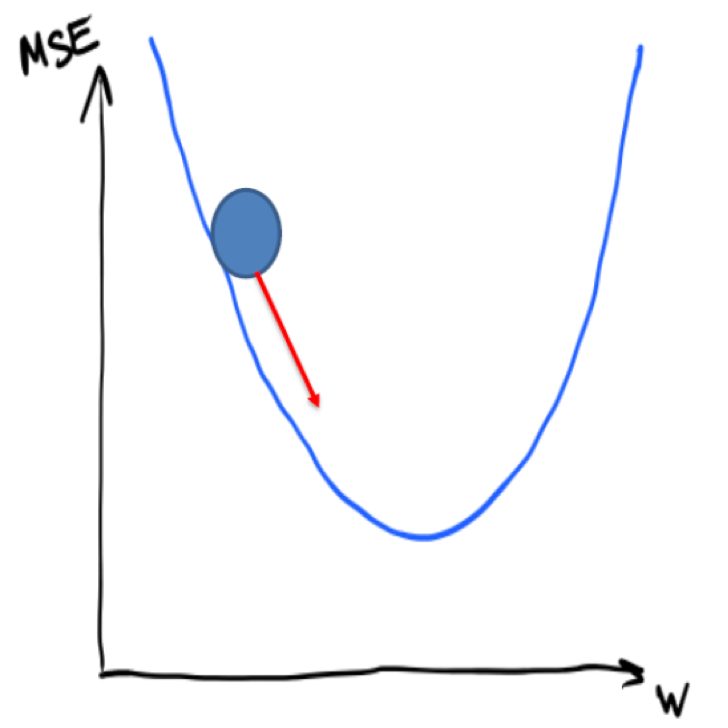

Первый вариант - стандартный - минимизируем MSE.

In [124]:
from sklearn.linear_model import SGDRegressor

lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

lr_mse.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)

In [125]:
pred_test = lr_mse.predict(X_test)

r2_score(y_test, pred_test)

0.560227865666836

Теперь попробуем минимизировать MAE

### Задание


*  обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  подберите `learning_rate` и `eta0` так, чтобы получить наилучшее качество на тестовых данных

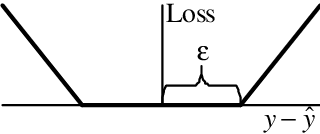

In [126]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000, learning_rate='optimal', random_state=42)

In [127]:
# ваш код здесь

lr_mae.fit(X_train, y_train)

y_pred_mae = lr_mae.predict(X_test)

r2_score(y_test, y_pred_mae)

0.5280284554821728

In [128]:
from sklearn.metrics import mean_absolute_percentage_error

print(f'''MSE loss:
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
mape={mean_absolute_percentage_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss:
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
mape={mean_absolute_percentage_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

MSE loss:
mae=0.5607145334484367
mse=0.5819144501859258
mape=0.34142464805594114
R2=0.560227865666836

MAE loss:
mae=0.5534435220468144
mse=0.6245212927097961
mape=0.3164697049290548
R2=0.5280284554821728



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [129]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 4.317444524722972
MAE Loss: 6.23293263308919


В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Интерпретация прогнозов модели

In [130]:
lr_mse.coef_

array([ 0.79128564,  0.19340895, -0.03201605,  0.04555293,  0.02039492,
       -0.04446739, -0.33223991, -0.29147816])

In [131]:
results = pd.DataFrame({'features' : X_train.columns, 'weights' : lr_mse.coef_})

results = results.sort_values(by='weights')

In [132]:
results

,features,weights
6,Latitude,-0.332240
7,Longitude,-0.291478
5,AveOccup,-0.044467
2,AveRooms,-0.032016
4,Population,0.020395
3,AveBedrms,0.045553
1,HouseAge,0.193409
0,MedInc,0.791286


# Домашнее задание: Линейные модели. Начало

В этом домашнем задании будем работать с датасетом `diabetes` - предсказывать уровень сахара в крови пациентов по определенным показателям.

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)

X = data.data
y = data.target

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Задание 1

Есть ли в наборе данных пропущенные значения? Если да, то удалите их.

Сколько строк после удаления стало в датасете?

In [135]:
# your code here

print(X.shape[0])

data.data.isna().sum()

442


age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `random_state=42` для воспроизводимости результатов.

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Задание 2

На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsRegressor`).

Вычислите значение метрики $R^2$ на тесте для каждой из моделей. Чему равно значение метрики для лучшей модели? Ответ округлите до сотых.

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor()

params = {
    'n_neighbors': [1, 3, 5, 10 ,15, 25]
}

gs = GridSearchCV(knn_reg, param_grid=params, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 25]}, scoring='r2')

In [138]:
gs.best_estimator_

KNeighborsRegressor(n_neighbors=15)

In [139]:
y_pred = gs.predict(X_test)
r2_score(y_test, y_pred)

0.43540008374570704

In [140]:
# your code here

n_neighbors_list = [1, 3, 5, 10 ,15, 25]

scores = []

for n_neighbors in n_neighbors_list:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

list(map(lambda x: round(x, 2), scores))

[-0.04, 0.32, 0.4, 0.42, 0.44, 0.45]

## Задание 3

Теперь обучите линейную регрессию (LineaRegression) на тренировочных данных и выведите $R^2$ на тесте, ответ округлите до сотых. Какое значение метрики получилось?

In [141]:
from sklearn.linear_model import LinearRegression

# your code here

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
round(r2, 2)

0.4772897164322618


0.48

## Задание 4

Обучите SGDRegressor с гиперпараметрами по умолчанию на тренировочных данных и выведите $R^2$ на тесте, ответ округлите до сотых. Какое значение метрики получилось?

In [142]:
from sklearn.linear_model import SGDRegressor

# your code here

sgd = SGDRegressor()

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
round(r2_score(y_test, y_pred), 2)

0.42

## Задание 5

Подберите оптимальный градиентный шаг `eta0` для SGDRegressor. Перебирайте шаг в диапазоне от 0.00001 до 0.1 не включительно с шагом 0.0001.

Какого наилучшего качества на тесте удалось добиться? Полученное значение $R^2$ округлите до сотых.

In [143]:
# your code here

eta0_list = np.arange(0.00001, 0.1, 0.0001)

max_score = -1

for eta0 in eta0_list:
    sgd = SGDRegressor(eta0=eta0)
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    score = r2_score(y_test, y_pred)
    if score > max_score:
        max_score = score
print(max_score)
round(max_score, 2)

0.47779748037952907


0.48

## Задание 6

Обучите SGDRegressor с функцией потерь MAE (другие гиперпараметры оставьте по умолчанию). Чему равен $R^2$ на тесте? Ответ округлите до сотых.

P.S. Зафиксируйте `random_state=42`.

In [144]:
# your code here

sgd = SGDRegressor(loss='epsilon_insensitive', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
round(r2_score(y_test, y_pred), 2)

-0.24

## Задание 7

Выведите на экран веса наилучшей из линейных моделей.

Какой признак имеет наибольший по модулю вес?

In [145]:
# your code here

pd.DataFrame({'features': X.columns, 'weights': lin_reg.coef_}).sort_values('weights', key=abs, ascending=False).set_index('features')

,weights
features,
s1,-901.959668
s5,659.268951
bmi,546.299723
s2,506.763241
bp,388.398341
s4,288.035267
sex,-261.706469
s3,121.154351
s6,41.376701


# 4.1 Градиентный спуск

Сгенерируем выборку для задачи регрессии и визуализируем данные

In [146]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y)

(100,)
(100, 1)


Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [147]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [148]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем константный признак (столбец из 1)

    params = np.random.rand(X.shape[1]) # инициализируем веса

    m = X.shape[0] # число объектов

    cost_track = np.zeros((iterations,1)) # массив с ошибками (MSE)

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [149]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    return X @ params

Применим градиентный спуск

In [150]:
track, weights = gradient_descent(X, y, 0.01, 100)

In [151]:
plt.plot(track)

Сделаем предсказание

In [152]:
pred = predict(X, weights)

pred[:10]

array([-10.37644938, -10.16061714,  -9.94478491,  -9.72895268,
        -9.51312044,  -9.29728821,  -9.08145598,  -8.86562374,
        -8.64979151,  -8.43395928])

Добавим к графику полученную регрессионную прямую

In [153]:
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')

# 4.2 Регуляризация

Загрузим один из стандартных датасетов - измеряем уровень сахара в крови.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [155]:
y[:5]

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Разобъем данные на обучающую и тестовую выборки.

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121)

Обучим линейную регрессию и сделаем предсказание, посчитаем MSE.

In [157]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)
pred_lr_test = lr.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2797.7514576013486
3092.163072559674


Добавим много-много признаков.

In [158]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X_train[col_name] = X_train[col1]*X_train[col2]
            X_test[col_name] = X_test[col1]*X_test[col2]
X_train.head()

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343,...,0.000657,0.002045,0.000576,0.000049,0.000048,-0.000862,-0.001305,0.001384,0.003024,0.001628
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357,...,-0.000485,-0.001944,0.002760,0.001802,0.001960,0.003726,-0.004549,0.002930,0.000778,0.001471
120,-0.049105,-0.044642,0.004572,0.011544,-0.037344,-0.018537,-0.017629,-0.002592,-0.039809,-0.021788,...,0.001070,0.000973,-0.000100,-0.000252,0.000814,0.000404,0.000384,0.000056,0.000867,0.000475
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014821,0.061054,...,0.002325,0.003094,0.000345,0.001966,0.000408,0.001067,-0.001526,0.002095,0.000905,0.003728
40,0.005383,0.050680,-0.008362,0.021872,0.054845,0.073215,-0.024993,0.034309,0.012551,0.094191,...,0.000507,0.004774,-0.000788,0.002060,0.005166,0.006896,-0.002354,0.003232,0.001182,0.008872


In [159]:
X_train.shape

(331, 110)

Обучим на расширенном датасете линейную регрессию и сделаем предсказание, вычислим MSE.

In [160]:
lr2 = LinearRegression()

lr2.fit(X_train, y_train)

pred_lr_train = lr2.predict(X_train)
pred_lr_test = lr2.predict(X_test)

print(mean_squared_error(y_train, pred_lr_train))
print(mean_squared_error(y_test, pred_lr_test))

2187.328815606203
3789.875664677787


Получили переобученную модель. Посмотрим еще на веса.

In [161]:
from matplotlib import pyplot as plt

plt.hist(lr.coef_);

In [162]:
plt.hist(lr2.coef_);

Обучим линейную регрессию с L1-регуляризацией для разных значений коэффициента регуляризации alpha.

In [163]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso
import numpy as np

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(lasso.coef_,'\n')

alpha=1e-05
Train MSE: 2214.2003257814154
Test MSE: 3682.6771766438856
[ 3.27206508e+01 -2.58927411e+02  5.02587438e+02  3.54354009e+02
 -1.64220661e+02 -1.92122282e+01 -1.89522360e+02  9.63952626e+01
  5.48800752e+02  1.11219935e+02  1.97027832e+03  4.52101687e+03
  3.30676701e+02 -4.40083143e+02 -1.06907751e+03 -2.98453030e+03
  1.93186767e+03  1.18645207e+03  1.51892555e+03  2.64894146e+03
  1.87553704e+02 -0.00000000e+00  1.13316117e+03  1.71492560e+03
  3.47912051e+03 -8.42718781e+03 -0.00000000e+00 -3.77400170e+03
 -0.00000000e+00  1.23938095e+01  1.30127538e+02  1.88261940e+03
  6.90894291e+00  3.91701380e+03 -2.84233562e+03  0.00000000e+00
 -0.00000000e+00 -5.42458721e+03  1.25163420e+01 -0.00000000e+00
 -5.99305929e+02  7.65519631e+02  1.27188863e+03 -1.70614358e+03
  4.15262131e+03 -3.95631156e+03  1.01680030e+03  3.17717581e+02
  0.00000000e+00 -1.17822098e+03 -0.00000000e+00  9.74376077e+03
 -3.67741643e+02  1.02681002e+03  6.02644060e+03 -5.17608061e+03
 -1.07341576e+04 -2

Обучим линейную регрессию с L2-регуляризацией для разных значений коэффициента регуляризации alpha.

In [164]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(1e-5, 1.1+1e-5, 0.25):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_train))
    print('Test MSE:', mean_squared_error(y_test, y_pred_test))
    print(ridge.coef_,'\n')

alpha=1e-05
Train MSE: 2228.5169783657398
Test MSE: 3599.2165538299137
[ 2.97870293e+01 -2.61341540e+02  4.99381130e+02  3.50960002e+02
 -3.10876390e+03  2.56925903e+03  9.20261948e+02  1.07795034e+02
  1.53107157e+03  1.08923874e+02  2.06983781e+03  2.24480297e+03
  1.56184248e+02 -4.58985234e+02 -1.55698690e+01 -1.89817091e+03
  1.15767286e+03  4.60588345e+02  7.49478859e+02  1.32524200e+03
  2.24480297e+03 -1.57810625e+00  1.50855089e+03  1.23676628e+03
  4.02901844e+03 -3.66993626e+03 -2.00897472e+02 -1.58052454e+03
 -1.30001733e+03 -4.24047622e+01  1.56184248e+02  1.50855089e+03
 -1.14430049e+02  2.59664770e+03 -2.12208495e+02  2.70726677e+03
 -1.45743347e+03 -2.76359153e+03 -3.55146870e+02 -1.99535488e+02
 -4.58985234e+02  1.23676628e+03  2.59664770e+03 -1.72607995e+03
  1.33302626e+03 -1.73579237e+03  9.02342421e+02  8.79158410e+02
  1.44904357e+02 -9.76888734e+02 -1.55698690e+01  4.02901844e+03
 -2.12208495e+02  1.33302626e+03  2.66264515e+03  1.36983414e+03
 -3.04512233e+03 -5

# 4.2 Домашнее задание. Градиентный спуск

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


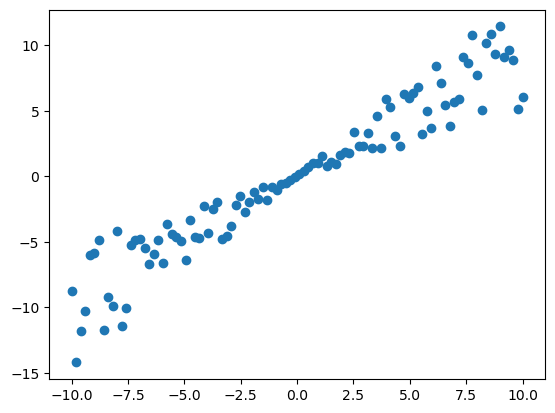

In [2]:
np.random.seed(42)

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y);

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [3]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \eta\nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

## Задание 1

Добавьте в функцию градиентного спуска из семинара L2-регуляризацию.

В этом случае градиент будет считаться по формуле

$$\nabla_w Q(w)=\frac2m (X^T(Xw-y)+\lambda w).$$

Добавьте в функцию `gradient_descent` гиперпараметр `lambda_`, задайте его по умолчанию равным нулю.

In [ ]:
def gradient_descent(X, y, learning_rate, iterations, ...):
    
    # your code here

SyntaxError: invalid syntax (3700232750.py, line 1)

## Задание 2

Модифицируйте функцию из задания 1 так, чтобы она осуществляла стохастический градиентный спуск - назовите новую функцию `stochastic_gradient_descent` (она также должна учитывать регуляризацию).

* в стохастическом градиентном спуске на каждой итерации метода мы выбираем случайный объект - пусть это будет индекс случайного объекта `ind`

* затем применяем обычный градиентный спуск, но с условием, что градиент считается не по всем объектам, а только по объекту с индексом `ind`, поэтому в формуле для обновления весов должно произойти два изменения:
  - мы обращаемся не ко всей матрице `X`, а только к одному объекту.

  **Подсказка:** чтобы матричная запись не поменялась, мы можем объявить новую матрицу `X_ind = X[ind, :].reshape(-1,1)` и работать с ней.
  - при вычислении градиента по одному объекту делить результат на число объектов `m` не требуется.

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, ...):

    X = ... # добавляем в матрицу X столбец из единиц

    params = np.random.rand(X.shape[1]) # инициализация весов

    # your code here

Создадим функцию для получения предсказания модели

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

## Вопрос 1

Примените функцию `gradient_descent` без регуляризации, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here

## Вопрос 2

Примените функцию `gradient_descent` с коэффициентом регуляризации 1000, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here

## Вопрос 3

Примените функцию `stochastic_gradient_descent` без регуляризации, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

## Вопрос 4

Примените функцию `stochastic_gradient_descent` с коэффициентом регуляризации 100, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

## Вопрос 5

Нарисуйте ошибку в зависимости от номера итерации для GD и SGD на одной картинке. Используйте для обучения в обоих случаях `learning_rate=0.001, iterations=100, lambda_=0.`

Можно ли сказать, что оба графика монотонно убывают?

In [ ]:
# your code here

## Задание (бонус, без проверки)

Реализуйте стохастический градиентный спуск с регуляризацией в виде класса. Протестируйте его.

In [ ]:
# your code here